In [4]:
# %run "../../../common/0_notebooks_base_setup.py"    

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# Checkpoint Estadística Descriptiva

Para esta práctica usaremos un subconjunto de los registros de un dataset de Kaggle que tiene datos oceanográficos https://www.kaggle.com/sohier/calcofi

El conjunto de datos de CalCOFI representa la serie cronológica más larga (desde 1949 hasta el presente) y más completa (más de 50.000 estaciones de muestreo) de datos oceanográficos y de larvas de peces del mundo. 

Incluye datos sobre la abundancia de las larvas de más de 250 especies de peces; datos de frecuencia de tallas de larvas y datos de abundancia de huevos en especies comerciales clave; y datos oceanográficos y de plancton. 

Los datos físicos, químicos y biológicos recopilados a intervalos regulares de tiempo y espacio son valiosos para documentar los ciclos climáticos en la corriente de California y una variedad de respuestas biológicas a esos ciclos. 

La idea de esta práctica es analizar las variables numéricas de este dataset reducido (sólo cinco estaciones de muestreo) calculando medidas de tendencia central, de dispersión, y de asociación entre esas variables.


## Ejercicio 1
Leer los datos del archivo /M1/CLASE_04_EstadisticaDescriptiva/Data/bottle_reducido.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Cada uno del los registros del dataset representa una medición en una estación. Las variables medidas son profundidad, temperatura, saturación de oxígeno, nivel de salinidad.

Las columnas son:

* **Sta_ID**: cadena de caracteres, representa el id de la estación

* **Depth_ID**: cadena de caracteres, representa el id de la medición

* **Depthm**: numérico, representa la profundidad en metros 

* **T_degC**: numérico, representa la temperatura en grados centigrados

* **O2Sat**: numérico, representa la saturación de oxígeno

* **Salnty**: numérico, representa el nivel de salinidad

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [5]:
import numpy as np

# local:
data_location = '../Data/bottle_reducido.csv'
data_type_str = np.genfromtxt(data_location, skip_header=1, delimiter='\t', dtype="str")
data_type_str

array([['044.0 048.5', '19-4904CR-HY-087-0606-04400485-0000B-3', '0',
        '10.3', '92.8', '33.03'],
       ['044.0 048.5', '19-4904CR-HY-087-0606-04400485-0006A-3', '6',
        '18.46', '111.8', '32.92'],
       ['044.0 048.5', '19-4904CR-HY-087-0606-04400485-0010A-7', '10',
        '10.29', '95.0', '32.951'],
       ...,
       ['036.7 115.0', '19-4911BD-HY-318-2130-03671150-1100A-7', '1100',
        '3.51', '6.4', '34.44'],
       ['036.7 115.0', '19-4911BD-HY-318-2130-03671150-1200A-7', '1200',
        '3.29', '7.3', '34.481'],
       ['036.7 115.0', '19-4911BD-HY-318-2130-03671150-1247A-3', '1247',
        '3.18', '7.6', '34.5']], dtype='<U38')

## Ejercicio 2

Sobre los datos de nivel de salinidad (columna Salnty) calcular:

* media

* mediana 

* desvio

* rango


In [6]:
salinity_column_index = 5
salinity_vector = data_type_str[:, salinity_column_index]
salinity_vector_numeric = salinity_vector.astype(float)
salinity_mean = np.around(np.mean(salinity_vector_numeric), decimals=2)
salinity_median = np.around(np.median(salinity_vector_numeric), decimals=2)
salinity_std = np.around(np.std(salinity_vector_numeric), decimals=2)
salinity_range =  np.around(np.max(salinity_vector_numeric) - np.min(salinity_vector_numeric), decimals=2)
print(f"salinity mean : {salinity_mean}, median: {salinity_median}, desviation: {salinity_std}, range: {salinity_range}")

salinity mean : 33.6, median: 33.85, desviation: 0.66, range: 2.36


## Ejercicio 3

Usando la función `distribution_plotter` graficar las distribuciones de las variables Depthm, T_degC, O2Sat, Salnty

<code>

import seaborn as sns

def distribution_plotter(data, label, bin_width=100):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)
</code>


Qué pueden decir de estas distribuciones?

Pongan atención en la elección del parámetro `bin_width` para que el gráfico sea informativo.


In [7]:
import seaborn as sns

def distribution_plotter(data, label, bin_width=100):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)

In [8]:
depthm_column_index = 2
tdegC_column_index = 3
o2sat_column_index = 4

depthm_vector_numeric = data_type_str[:, depthm_column_index].astype(float)
tdegC_vector_numeric = data_type_str[:, tdegC_column_index].astype(float)
o2sat_vector_numeric = data_type_str[:, o2sat_column_index].astype(float)


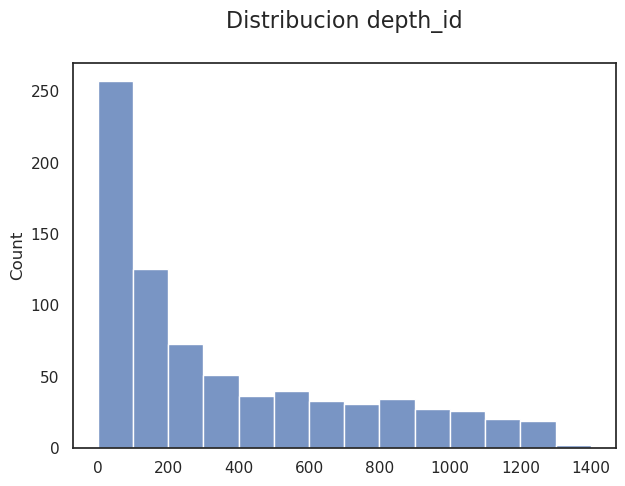

In [9]:
distribution_plotter(depthm_vector_numeric, "depth_id", 100)

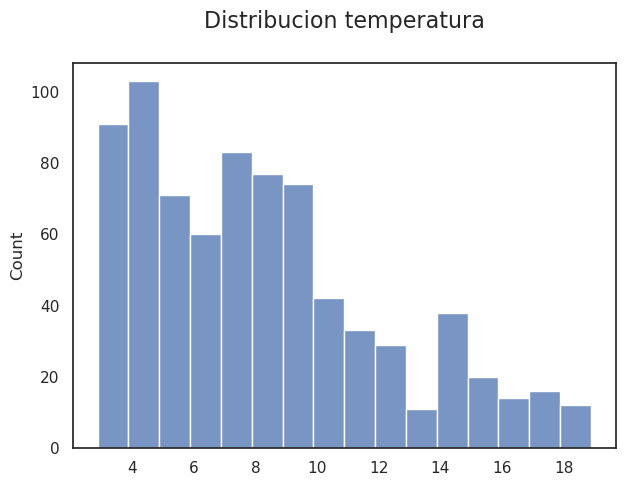

In [10]:
distribution_plotter(tdegC_vector_numeric, "temperatura", 1)

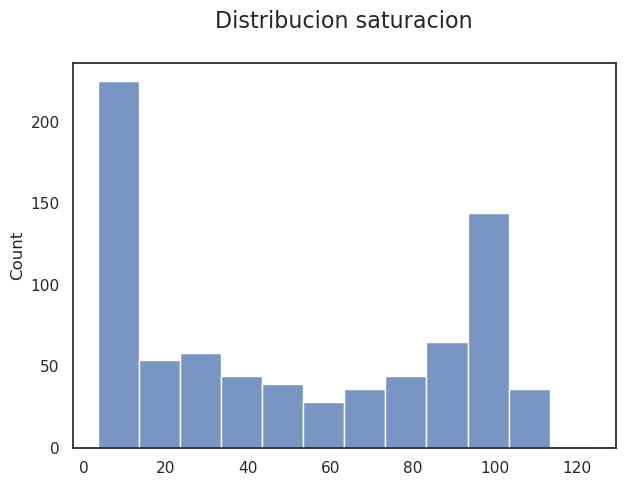

In [11]:
distribution_plotter(o2sat_vector_numeric, "saturacion", 10)

## Ejercicio 4

Calcular las matrices de correlación y covarianza de las variables Depthm, T_degC, O2Sat, Salnty

A partir de estos resultados, elegir sólo una de estas variables para intentar predecir el valor de salinidad:

* ¿Usarían para esto la matriz de correlación o la de covarianzas? ¿Por qué?

* ¿Qué variable elegirían? Justificar la decisión.



In [12]:
variables_colums_index = range(2,6)

X = data_type_str[:, variables_colums_index].astype(float)

X

array([[   0.   ,   10.3  ,   92.8  ,   33.03 ],
       [   6.   ,   18.46 ,  111.8  ,   32.92 ],
       [  10.   ,   10.29 ,   95.   ,   32.951],
       ...,
       [1100.   ,    3.51 ,    6.4  ,   34.44 ],
       [1200.   ,    3.29 ,    7.3  ,   34.481],
       [1247.   ,    3.18 ,    7.6  ,   34.5  ]])

In [13]:
correlacion = np.corrcoef(X.T)
correlacion


array([[ 1.        , -0.81016811, -0.83900896,  0.83514915],
       [-0.81016811,  1.        ,  0.8955951 , -0.91514575],
       [-0.83900896,  0.8955951 ,  1.        , -0.97048787],
       [ 0.83514915, -0.91514575, -0.97048787,  1.        ]])

In [14]:
covarianza = np.cov(X.T)
covarianza

array([[ 1.22730122e+05, -1.11538543e+03, -1.10802454e+04,
         1.92117557e+02],
       [-1.11538543e+03,  1.54435978e+01,  1.32676236e+02,
        -2.36152167e+00],
       [-1.10802454e+04,  1.32676236e+02,  1.42106646e+03,
        -2.40228614e+01],
       [ 1.92117557e+02, -2.36152167e+00, -2.40228614e+01,
         4.31176278e-01]])

In [15]:
xdepthm_column_index = 0
xtdegc_column_index = 1
xo2sat_column_index = 2
xsalinity_column_index = 3

In [16]:
covarianzas_salinity = [ 
    abs(covarianza[xsalinity_column_index, xdepthm_column_index]), 
    abs(covarianza[xsalinity_column_index, xtdegc_column_index]), 
    abs(covarianza[xsalinity_column_index, xo2sat_column_index]), 
]

correlacion_salinity = [ 
    abs(correlacion[xsalinity_column_index, xdepthm_column_index]), 
    abs(correlacion[xsalinity_column_index, xtdegc_column_index]), 
    abs(correlacion[xsalinity_column_index, xo2sat_column_index]), 
]

In [17]:
np.argmax(covarianzas_salinity)

0

In [18]:
np.argmax(correlacion_salinity)

2

In [19]:
print(f"covarianzas: {covarianzas_salinity}")
print(f"correlacion: {correlacion_salinity}")

covarianzas: [192.11755735397847, 2.361521672867549, 24.02286136900763]
correlacion: [0.8351491508376464, 0.9151457452033671, 0.9704878676544934]


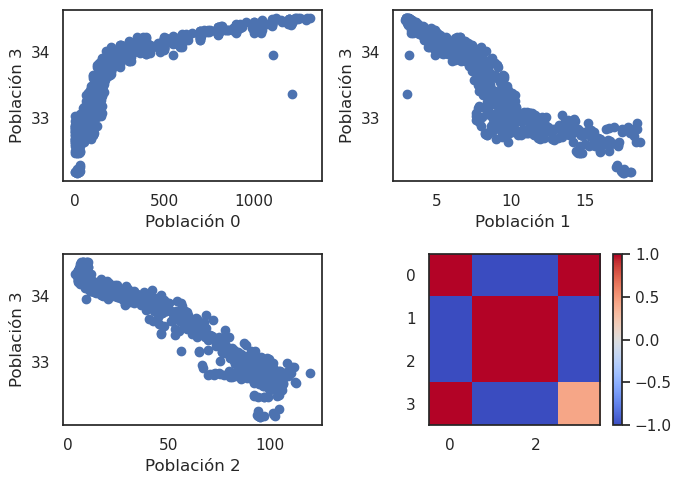

In [21]:
import matplotlib.pyplot as plt


"""cov_matrix=np.cov([conejos, linces, zanahorias])
print(cov_matrix)
# Obtener los pares de variables a comparar
pairs = [(0, 1), (0, 2), (1, 2)]

# Plotear los scatter plots de las variables
for i, pair in enumerate(pairs):
    plt.subplot(2, 2, i+1)
    plt.scatter(poblaciones[:, pair[0]], poblaciones[:, pair[1]])
    plt.xlabel("Población " + str(pair[0]))
    plt.ylabel("Población " + str(pair[1]))

# Plotear la matriz de correlación
plt.subplot(2, 2, 4)
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, interpolation='nearest')
plt.colorbar()

plt.tight_layout()
plt.show()

X"""
pairs = [(0, 3), (1, 3), (2, 3)]

# Plotear los scatter plots de las variables
for i, pair in enumerate(pairs):
    plt.subplot(2, 2, i+1)
    plt.scatter(X[:, pair[0]], X[:, pair[1]])
    plt.xlabel("Población " + str(pair[0]))
    plt.ylabel("Población " + str(pair[1]))

# Plotear la matriz de correlación
plt.subplot(2, 2, 5)
plt.imshow(correlacion, cmap='coolwarm', vmin=-1, vmax=1, interpolation='nearest')
plt.imshow(covarianza, cmap='coolwarm', vmin=-1, vmax=1, interpolation='nearest')

plt.colorbar()

plt.tight_layout()
plt.show()